In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe =pd.read_csv(r'C:\Users\asati\Downloads\Zomato data .csv')
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
def Handle_Rate(value) :
    value = str(value).split('/')
    value = value[0]
    return float(value)
dataframe['rate'] = dataframe['rate'].apply(Handle_Rate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant ')

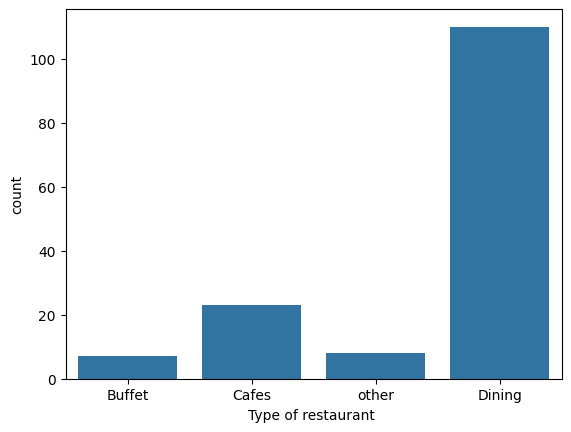

In [6]:
sns.countplot(x = dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant ")

In [7]:
# We can conclude that most of the restaurant fall under dining category

Text(0, 0.5, 'Votes')

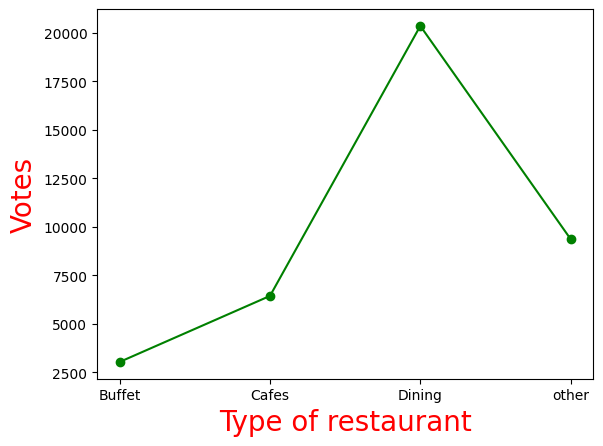

In [8]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result , c = 'g' , marker = 'o')
plt.xlabel("Type of restaurant" , c = 'r' , size = 20)
plt.ylabel('Votes' , c = 'r' , size = 20)

In [9]:
# Hence dining resaturants are preffered by large number of individuals

In [10]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes , 'name']
print("Restaurant with maximum votes")
print(restaurant_with_max_votes)

Restaurant with maximum votes
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

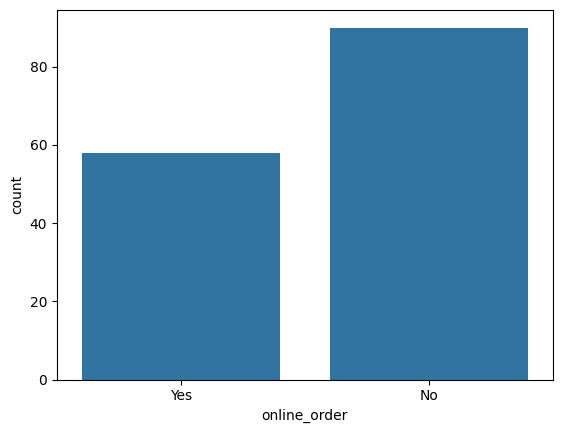

In [11]:
sns.countplot(x = dataframe['online_order'])

In [12]:
# This suggests that majority of restaurants do not accept online order

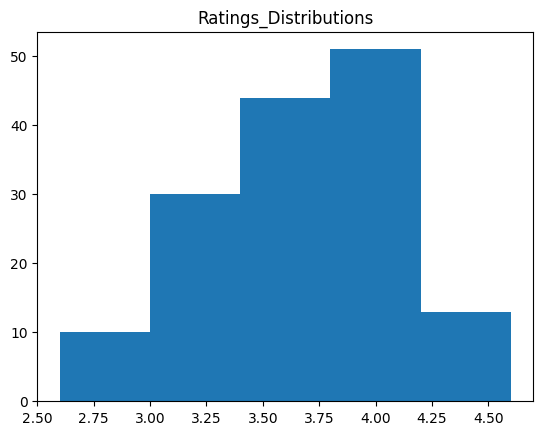

In [21]:
plt.hist(dataframe['rate'] , bins = 5)
plt.title('Ratings_Distributions')
plt.show()

In [14]:
# Thr majority of restaurants recieved ratings from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

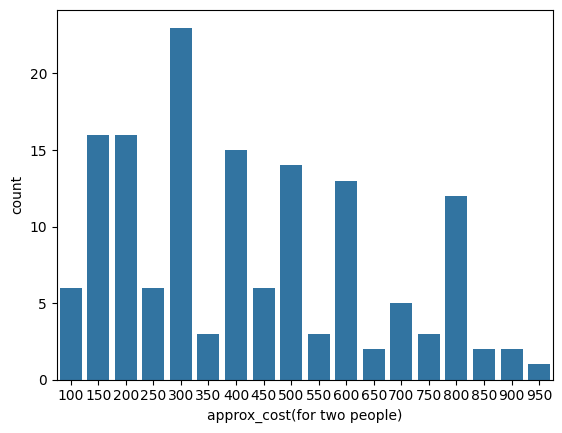

In [15]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)

In [16]:
# majority of couple prefer restaurants with approximate cost of 300


<Axes: xlabel='online_order', ylabel='rate'>

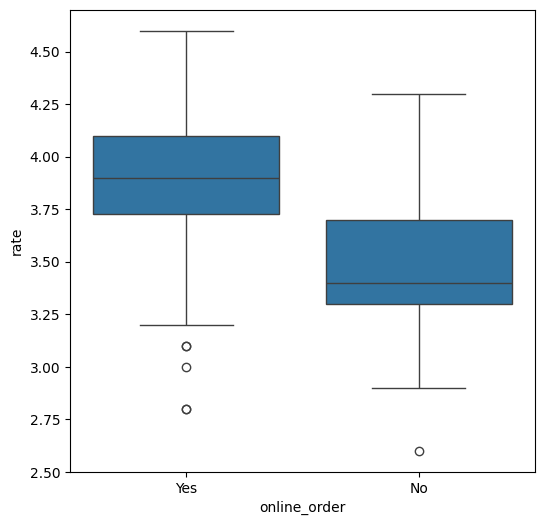

In [17]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order' , y = 'rate' , data = dataframe)

In [18]:
# Offline orders recieved lower ratings in comparision to online orders , which obtained excellent ratings

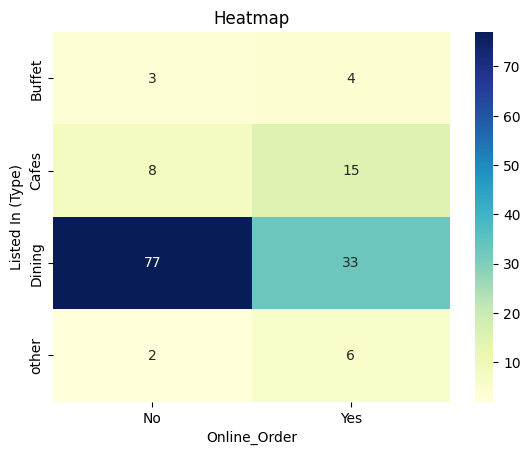

In [19]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)' , columns = 'online_order' , aggfunc = 'size' , fill_value = 0)
sns.heatmap(pivot_table , annot = True , cmap = 'YlGnBu' , fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online_Order")
plt.ylabel("Listed In (Type)")
plt.show()

In [20]:
'''Dining restaurants primarily accept offline orders , whereas cafes primarily recieves online orders . This suggests that client 
   prefer to place orders in person at restaurants , but prefer online ordering cafes'''

'Dining restaurants primarily accept offline orders , whereas cafes primarily recieves online orders . This suggests that client \n   prefer to place orders in person at restaurants , but prefer online ordering cafes'